### **Análise de Padrões Não Lineares no Nível de Estresse ao Longo do Tempo**

🔍 **Contexto**:
Acompanhar a evolução do nível de estresse das pessoas ao longo do tempo pode ser essencial em diversos contextos — como no ambiente de trabalho, na saúde mental ou em projetos pessoais de desenvolvimento.

Neste projeto, simulamos dados que representam **o nível de estresse de uma pessoa ao longo de 100 dias consecutivos**. O objetivo é compreender se há um padrão claro nesse comportamento e qual seria a melhor abordagem para modelar esses dados.

Durante a análise, percebemos que o comportamento do estresse **não segue uma relação linear simples com o tempo**, e por isso utilizamos técnicas de regressão não paramétrica, como o **LOWESS** (*Locally Weighted Scatterplot Smoothing*), que são mais adequadas para capturar padrões não lineares.

🔧 **Este projeto explora**:

* A comparação entre modelos lineares e não lineares.

* O entendimento dos efeitos do parâmetro de suavização.

* As vantagens e limitações dos modelos não paramétricos.

🚀 *Este é um projeto com foco educacional, ideal para treinamento de conceitos em Análise Exploratória de Dados, Visualização e Modelagem Não Paramétrica.*

### **Entendimento dos Dados e Análise Exploratória**

In [ ]:
# Gerando os dados sintéticos

# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# Gerando os dados
np.random.seed(42)  # Para reprodutibilidade

dias = np.arange(1, 101)  # Dias de 1 a 100
# Gerando um padrão oscilatório + ruído
nivel_estresse = 5 + 2 * np.sin(dias * 0.2) + np.random.normal(0, 0.5, size=100)

# Criando o DataFrame
df = pd.DataFrame({
    'dia': dias,
    'nivel_estresse': nivel_estresse
})

# Visualizando as primeiras linhas
df.head()

,dia,nivel_estresse
0,1,5.645696
1,2,5.709705
2,3,6.453129
3,4,7.196227
4,5,6.565865


### **Análise Exploratória Inicial**

In [ ]:
# Resumo estatístico
df.describe()

,dia,nivel_estresse
count,100.000000,100.000000
mean,50.500000,5.016201
std,29.011492,1.508381
min,1.000000,2.295297
25%,25.750000,3.768430
50%,50.500000,4.863492
75%,75.250000,6.419414
max,100.000000,7.760506


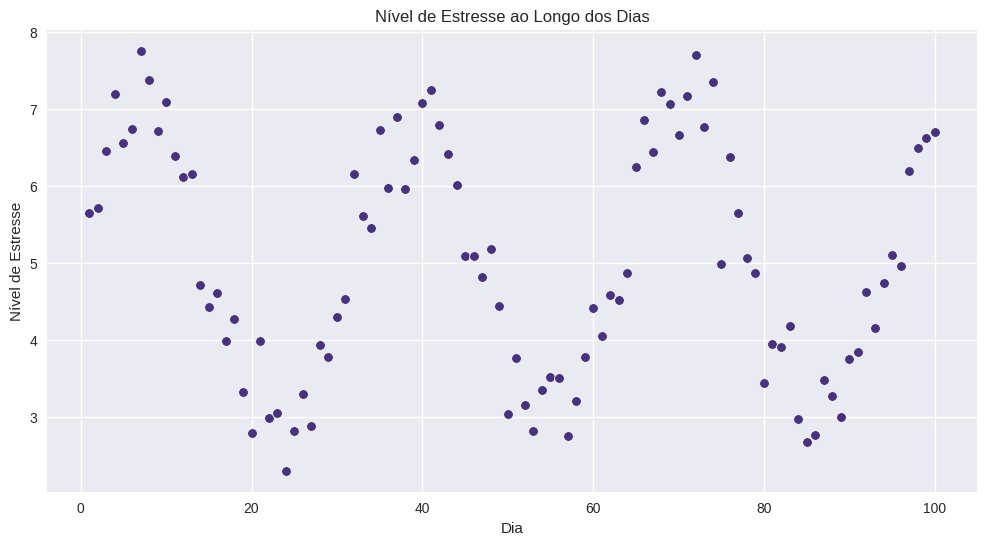

In [ ]:
# Plotando o comportamento dos dados
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='dia', y='nivel_estresse')
plt.title('Nível de Estresse ao Longo dos Dias')
plt.xlabel('Dia')
plt.ylabel('Nível de Estresse')
plt.show()

Podemos notar que os dados não seguem um padrão linear e sim um padrão de "zip-zag". O que já nos sugere que não devemos utilizar uma regressão linear. De qualquer forma, vamos colocar isso aprova!

### **Modelagem Linear (Baseline)**

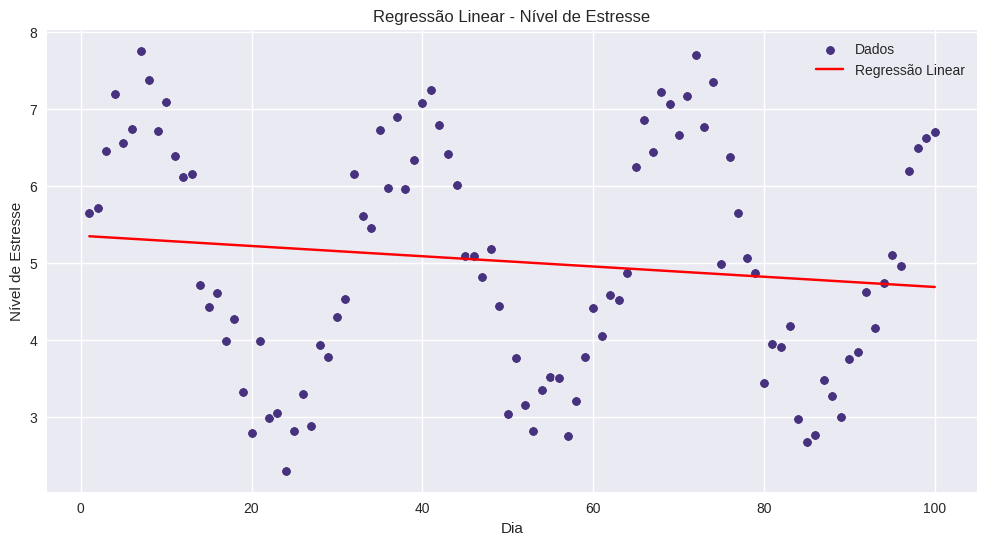

In [ ]:
from sklearn.linear_model import LinearRegression

# Remodelando os dados para o modelo
X = df['dia'].values.reshape(-1,1)
y = df['nivel_estresse'].values

# Criando o modelo
modelo_linear = LinearRegression()
modelo_linear.fit(X, y)

# Gerando previsões
y_pred = modelo_linear.predict(X)

# Plotando
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='dia', y='nivel_estresse', label='Dados')
plt.plot(df['dia'], y_pred, color='red', label='Regressão Linear')
plt.title('Regressão Linear - Nível de Estresse')
plt.xlabel('Dia')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.show()

In [ ]:
# Analisando o R²
r2 = modelo_linear.score(X, y)
print(f'R² da Regressão Linear: {r2:.4f}')

R² da Regressão Linear: 0.0164


## 📉 Avaliação da Regressão Linear como Modelo Inicial

A aplicação de uma regressão linear simples revelou que esse modelo **não é adequado para capturar o comportamento dos dados analisados**.

🔍 **Análise Visual:**  
A linha de regressão apresenta-se praticamente como uma reta horizontal, sem acompanhar o padrão claro de oscilação dos dados. Isso indica que **a relação entre o nível de estresse e o tempo não é linear**, sendo impossível representar seu comportamento através de uma linha reta.

📊 **Desempenho Estatístico (R²):**  
O valor do coeficiente de determinação (**R²**) obtido foi **próximo de zero**, o que confirma que o modelo linear é incapaz de explicar a variabilidade dos dados. Em termos simples, o modelo **não consegue prever o nível de estresse com base no tempo** de forma minimamente satisfatória.

✅ **Conclusão:**  
Esses resultados deixam evidente que, quando lidamos com dados que apresentam padrões sazonais, cíclicos ou não lineares, como é o caso deste dataset, a utilização de modelos lineares não se mostra eficaz. Portanto, torna-se necessário buscar técnicas de modelagem mais flexíveis, capazes de capturar relações não lineares, como é o caso da regressão não paramétrica.

Na próxima etapa, exploraremos a utilização do algoritmo **LOWESS (Locally Weighted Scatterplot Smoothing)**, que permite construir modelos mais aderentes ao padrão dos dados observados.


### **Aplicando o LOWESS ao dataset**

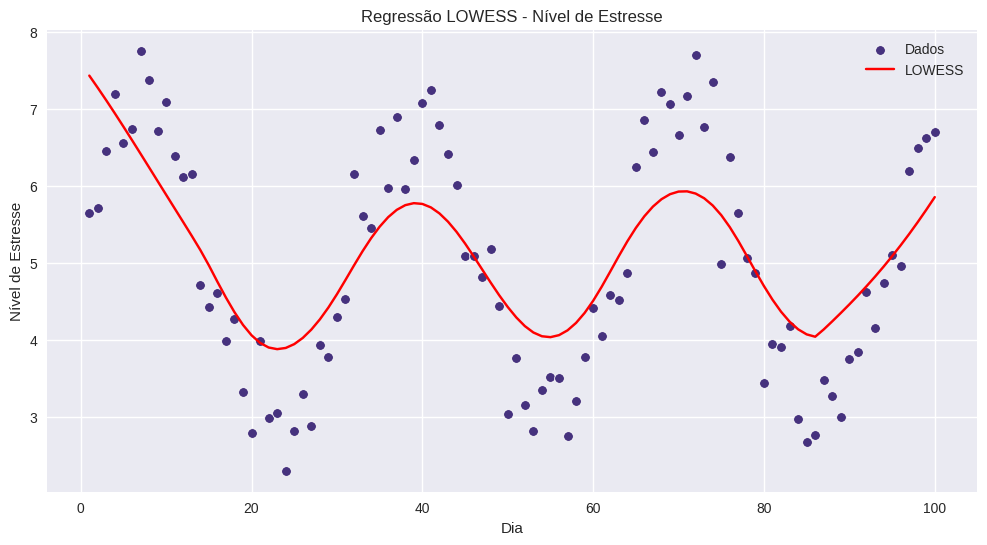

In [ ]:
import statsmodels.api as sm

# Aplicando LOWESS
lowess = sm.nonparametric.lowess
ajuste_lowess = lowess(df['nivel_estresse'], df['dia'], frac=0.3)

# Convertendo em DataFrame para plotagem
df_lowess = pd.DataFrame(ajuste_lowess, columns=['dia', 'nivel_estresse'])

# Plotando
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='dia', y='nivel_estresse', label='Dados')
plt.plot(df_lowess['dia'], df_lowess['nivel_estresse'], color='red', label='LOWESS')
plt.title('Regressão LOWESS - Nível de Estresse')
plt.xlabel('Dia')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.show()

## 🔍 Avaliação Inicial da Modelagem com LOWESS

A aplicação do modelo LOWESS apresentou uma melhora significativa na representação dos dados quando comparado à regressão linear. A linha de ajuste não paramétrica passou a acompanhar, de forma muito mais adequada, o padrão de oscilação (zig-zag) presente nos dados.

🔧 **Análise Visual:**  
O ajuste mostra-se visualmente coerente, conseguindo captar a tendência não linear dos dados. Diferente da regressão linear, que apresentou desempenho praticamente nulo, o LOWESS já permite visualizar de forma clara a dinâmica do comportamento do nível de estresse ao longo do tempo.

🚦 **Próximos passos:**  
Apesar dos bons resultados iniciais, é perceptível que há espaço para refinar ainda mais o modelo. A escolha do parâmetro `frac`, que controla o grau de suavização, será fundamental para encontrar o equilíbrio ideal entre subajuste e superajuste, buscando a melhor representação possível dos dados.

Na sequência, realizaremos testes variando o `frac` para compreender como essa parametrização impacta o ajuste do modelo.


### **Teste de Diferentes `frac` no LOWESS**

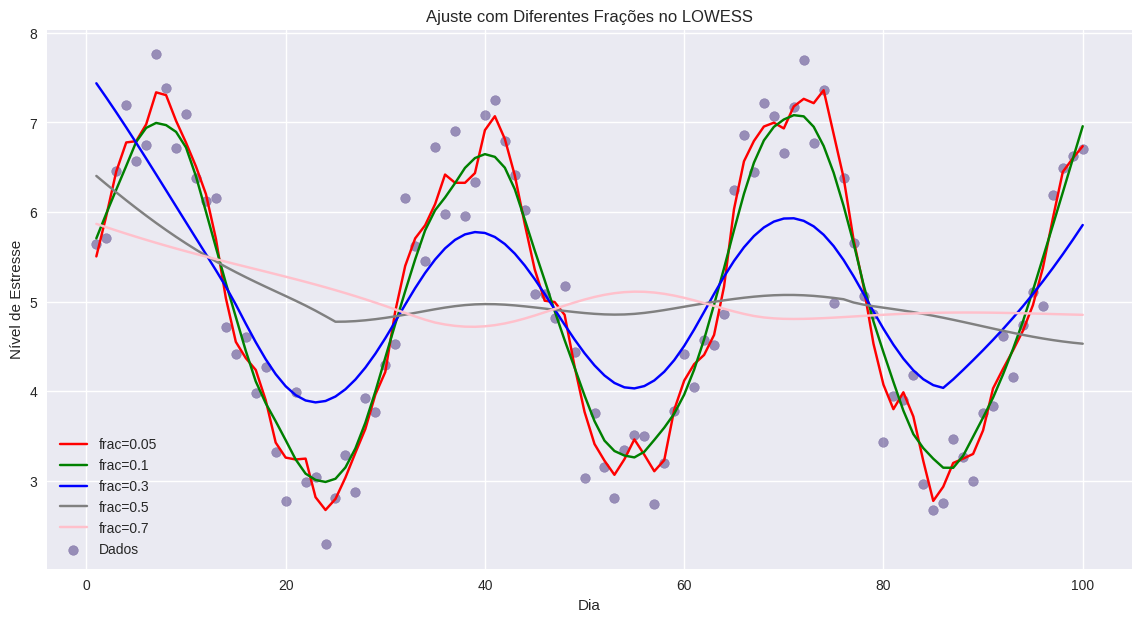

In [ ]:
plt.figure(figsize=(14, 7))

# Testando diferentes frac
colors = ['r','g','b', 'gray','pink']
idcor = 0
for frac in [0.05, 0.1, 0.3, 0.5, 0.7]:
  ajuste = lowess(df['nivel_estresse'], df['dia'], frac=frac)
  plt.plot(ajuste[:, 0], ajuste[:, 1], label=f'frac={frac}', color=colors[idcor])
  idcor += 1

# Plotando os dados
plt.scatter(df['dia'], df['nivel_estresse'], label='Dados', alpha=0.5)
plt.title('Ajuste com Diferentes Frações no LOWESS')
plt.xlabel('Dia')
plt.ylabel('Nível de Estresse')
plt.legend()
plt.show()



## 🔧 Avaliação dos Efeitos do Parâmetro `frac` no LOWESS

Para entender o impacto da suavização no modelo LOWESS, foram realizados testes variando o valor do parâmetro `frac`. Esse parâmetro controla o quanto o modelo prioriza os pontos locais (ajustes mais sensíveis) ou uma tendência mais global (ajustes mais suaves).

📊 **Observações dos testes:**  
- 🔺 **frac = 0.05:** Observou-se um claro fenômeno de **superajuste**, onde a linha começa a capturar até mesmo variações aleatórias dos dados, deixando de representar uma tendência geral.  
- ✅ **frac = 0.1:** Apresentou o melhor equilíbrio, conseguindo acompanhar o padrão oscilatório dos dados sem incorrer em superajustes ou subajustes.  
- 🔻 **frac = 0.7:** Gerou um comportamento de **subajuste**, onde a linha suaviza tanto que não é mais capaz de capturar as oscilações naturais do fenômeno analisado.

🎯 **Conclusão:**  
O valor de `frac = 0.1` foi considerado o mais adequado para este dataset, garantindo um bom balanceamento entre sensibilidade ao padrão dos dados e robustez contra ruídos.

Este tipo de experimento evidencia a importância de entender os hiperparâmetros em modelos não paramétricos, pois o ajuste adequado permite capturar de forma precisa a dinâmica real do fenômeno estudado.


### 🚀 **Conclusão do Projeto — Análise do Nível de Estresse ao Longo do Tempo**

Este projeto teve como objetivo compreender o comportamento do nível de estresse ao longo do tempo em um ambiente simulado. Ao longo da análise, foi possível identificar que os dados apresentam um padrão de comportamento não linear, evidenciado visualmente por uma tendência oscilatória (zig-zag) entre os dias analisados.

Inicialmente, aplicou-se uma regressão linear para avaliar a capacidade desse modelo em explicar o fenômeno. Contudo, tanto a análise visual quanto os indicadores estatísticos, como o coeficiente de determinação (R² próximo de zero), confirmaram que a abordagem linear é completamente inadequada para este tipo de dado.

A partir disso, foi explorada a técnica de modelagem não paramétrica utilizando LOWESS, que demonstrou ser muito mais eficaz para capturar o padrão real dos dados. Por meio de testes com diferentes valores do hiperparâmetro frac, foi possível compreender os efeitos do subajuste e do superajuste na suavização dos dados. O valor de frac = 0.1 se mostrou o mais equilibrado, proporcionando uma linha de ajuste que acompanha com precisão as oscilações naturais do nível de estresse, sem seguir ruídos e sem perder a tendência global.

Este projeto evidenciou a importância de escolher corretamente a abordagem de modelagem com base nas características dos dados. Além disso, destacou como técnicas não paramétricas, como o **LOWESS**, são ferramentas fundamentais no portfólio de um Cientista de Dados para lidar com situações onde os pressupostos de linearidade não se aplicam.